## Install Dependencies

In [59]:
%pip install matplotlib

import numpy as np
from matplotlib import pyplot as plt
from statistics import mean


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load result data

In [42]:
import json 

with open("experiment_results.json", "r") as results_file:
    experiments = json.load(results_file)

In [43]:
available_tags = set([
    experiment["params"]["tag"] for experiment in experiments
])
print("available tags:", available_tags)

available tags: {'reordering_varying_steps', 'varying_redundancy', 'reordering_varying_redundancy', 'varying_gates', 'varying_qubits'}


## RQ1: How does the degree of redundancy within a population influence the behavior of the proposed simulation approach?

In [68]:
# Filter out and format experiment results with the varying_redundancy tag

vr_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_redundancy"]
print(f"Total amount of varying_redundancy experiments: {len(vr_experiments)}")

Total amount of varying_redundancy experiments: 96


Redundancies: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


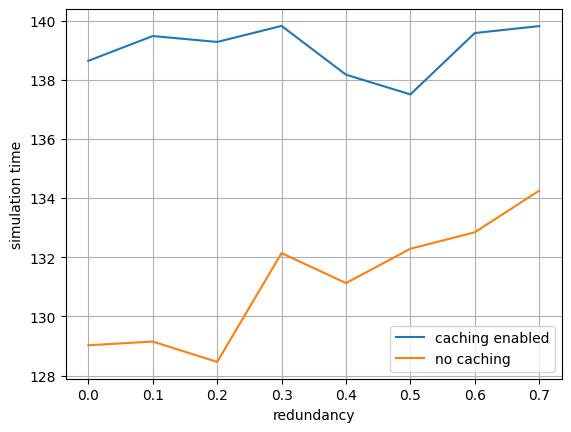

In [73]:
# Create a line chart with simulation time on y and redundancy level
# on x. One line for the runs with caching enabled, one line for the
# runs with cache size 0.

redundancies = [experiment["params"]["redundancy"] for experiment in vr_experiments]
redundancies = list(set(redundancies))
redundancies.sort()

print("Redundancies:", redundancies)

mean_durations_no_cache = []
mean_durations_with_cache = []

for redundancy in redundancies:

    durations_no_cache = [
        experiment["total_duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    mean_durations_no_cache.append(mean(durations_no_cache))

    durations_with_cache = [
        experiment["total_duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    mean_durations_with_cache.append(mean(durations_with_cache))


ax = plt.subplot()
ax.plot(redundancies, mean_durations_with_cache)
ax.set_xlabel("redundancy")
ax.set_ylabel("simulation time")

ax = plt.subplot()
ax.plot(redundancies, mean_durations_no_cache)
ax.set_xlabel("redundancy")
ax.set_ylabel("simulation time")


plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()

In [46]:
# Create a stack chart of the durations of different algorithm steps 
# for all runs where cache size = 100.


In [47]:
# Create box plots for sequence length and frequency of cached ngrams
# at different redundancy levels.


## RQ2.1: How does the amount of gates in the population influence simulation speed?

In [48]:
# Filter out and format experiment results with the varying_qubits tag

vq_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_qubits"]
print(f"Total amount of varying_qubits experiments: {len(vq_experiments)}")

Total amount of varying_qubits experiments: 60


In [49]:
# Create a line chart with simulation time on y and qubit count 
# on x. One line for the runs with caching enabled, one line for the 
# runs with cache size 0.


## RQ2.2: How does the amount of qubits per circuit influence simulation speed?

In [50]:
# Filter out and format experiment results with the varying_gates tag

vg_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_gates"]
print(f"Total amount of varying_gates experiments: {len(vg_experiments)}")

Total amount of varying_gates experiments: 100


In [51]:
# Create a line chart with simulation time on y and gate count per circuit 
# on x. One line for the runs with caching enabled, one line for the 
# runs with cache size 0.


## RQ3.1: How does the amount of reordering steps influence simulation speed?

In [52]:
# Filter out and format experiment results with the reordering_varying_steps tag

rvs_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "reordering_varying_steps"]
print(f"Total amount of reordering_varying_steps experiments: {len(rvs_experiments)}")

Total amount of reordering_varying_steps experiments: 55


In [53]:
# Create a line chart with simulation time on y and reordering step count 
# on x. 


## RQ3.2: How does the amount of reordering steps influence the lengths and frequencies of the cached gate sequences?

In [54]:
# Filter out and format experiment results with the reordering_varying_redundancy tag

rvr_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "reordering_varying_redundancy"]
print(f"Total amount of reordering_varying_redundancy experiments: {len(rvr_experiments)}")

Total amount of reordering_varying_redundancy experiments: 40


In [55]:
# TBD: How to best visualize change in redundancy depending on starting redundancy

In [56]:
# Create box plots for sequence length and frequency of cached ngrams
# at different reordering step counts.
